## Correlation and Redundancy

I claim that there is correlation and redundancy in the `customer` table. What I mean by this is that some features are linear combinations of other features. 

Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

customers = pd.read_csv('Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes([int])

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)
    target = data[feature]

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,target,test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [4]:
calculate_r_2_for_feature(customer_features,'Detergents_Paper')

0.68955180233880187

In [5]:
print("{:24} {}".format("Delicatessen: ", calculate_r_2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Degergents_paper: ", calculate_r_2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", calculate_r_2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", calculate_r_2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", calculate_r_2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", calculate_r_2_for_feature(customer_features,'Milk')))

Delicatessen:            -0.10110199949377607
Degergents_paper:        0.7237296133962476
Fresh:                   -0.15561863327423753
Frozen:                  0.15408964681328152
Grocery:                 0.5711225907682309
Milk:                    0.36936099492906893


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [6]:
def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [7]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -2.9743955952146393
Detergents_Paper:        0.664581339638863
Fresh:                   -0.72646632081378
Frozen:                  -0.8326070538178221
Grocery:                 0.6781021997531815
Milk:                    0.028011623136967624


In [8]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -2.8077039808500466
Detergents_Paper:        0.6552670432973136
Fresh:                   -0.7709724608776678
Frozen:                  -1.1212585099954124
Grocery:                 0.669636174477285
Milk:                    0.1539517179009045


##### Discussion

What does this tell us?

### Visualize Redundancy

Study the correlation of the data.

14.507956266403198


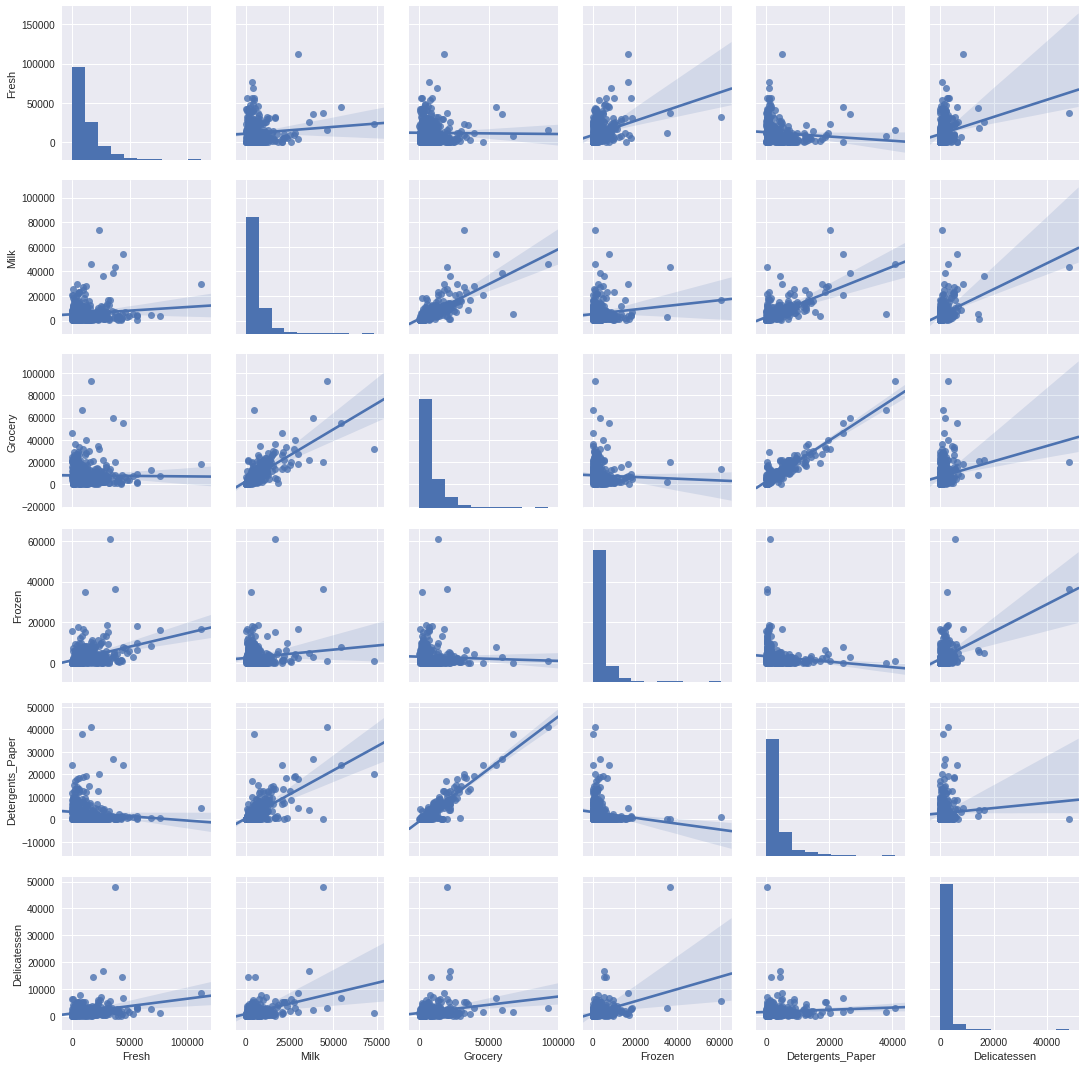

In [9]:
import time
start = time.time()
sns.pairplot(customer_features, kind='reg')
print(time.time() - start)

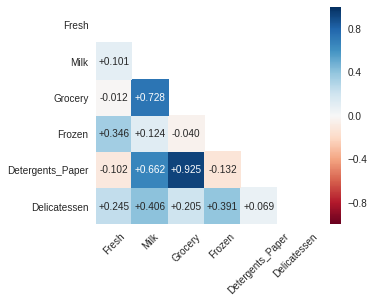

In [10]:
corr = customer_features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [11]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

In [12]:
sample_1pct_1 = customer_features.sample(5)

In [13]:
samp_stats = sample_1pct_1.describe().T
samp_stats['skew'] = st.skew(sample_1pct_1)
samp_stats['kurt'] = st.kurtosis(sample_1pct_1)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,5.0,10107.6,12759.709452,622.0,1725.0,4983.0,11594.0,31614.0,1.126619,-0.316084
Milk,5.0,3366.6,3202.526003,55.0,489.0,3651.0,4859.0,7779.0,0.247699,-1.298135
Grocery,5.0,6646.2,5858.136026,137.0,1495.0,6633.0,12144.0,12822.0,-0.014954,-1.708406
Frozen,5.0,5051.8,7303.444544,75.0,824.0,3242.0,3252.0,17866.0,1.358587,0.066258
Detergents_Paper,5.0,2697.8,3485.200525,7.0,111.0,912.0,4424.0,8035.0,0.757249,-1.035105
Delicatessen,5.0,1648.8,1278.895696,8.0,615.0,2157.0,2435.0,3029.0,-0.304111,-1.543527


In [14]:
stats = customer_features.describe().T
stats['skew'] = st.skew(customer_features)
stats['kurt'] = st.kurtosis(customer_features)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


---

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

You are already familiar with standardization.

$$Z = \frac{X-\mu}{\sigma}$$

In [17]:
scaler = StandardScaler()
scaler.fit(customer_features)
customer_sc = scaler.transform(customer_features)

customer_sc_df = pd.DataFrame(customer_sc, columns=customer_features.columns)

sc_stats = customer_sc_df.describe().T
sc_stats['skew'] = st.skew(customer_features)
sc_stats['kurt'] = st.kurtosis(customer_features)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738,2.552583,11.392124
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650,4.039922,24.376349
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528,3.575187,20.664153
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002,5.887826,54.056180
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672,3.619458,18.780528
Delicatessen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447,11.113534,168.747781


### Visualizing Data Transformation

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


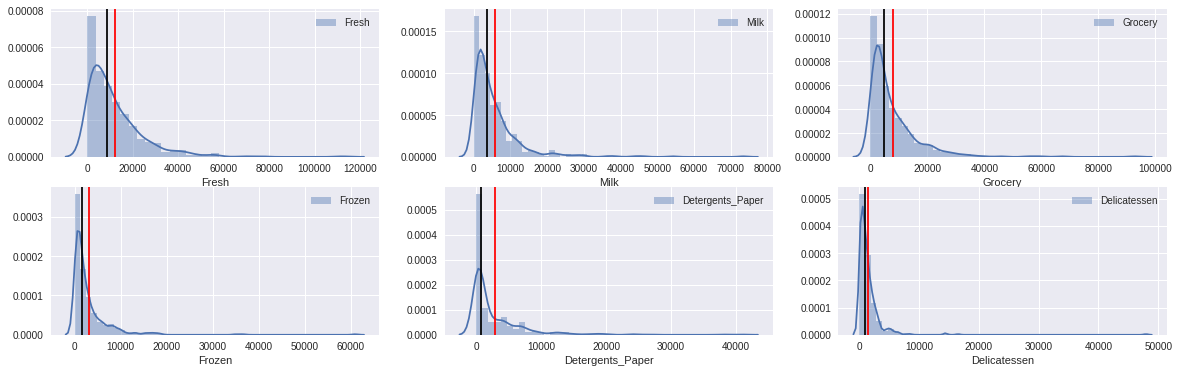

In [16]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_features.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_features[col], label=col)
    plt.axvline(customer_features[col].mean(), c='red')
    plt.axvline(customer_features[col].median(), c='black')
    plt.legend()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


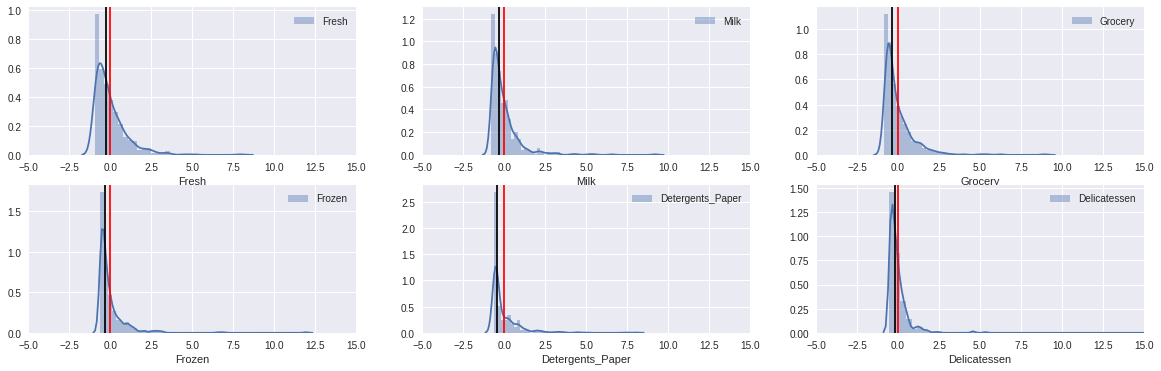

In [17]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()
    plt.xlim(-5,15)

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---